# Clustering data with k-means

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn.cluster import KMeans


#import matplotlib as mpl
import seaborn as sns
%matplotlib inline

## Basics of k-means clustering

Generating our data

In [2]:
X, y = sk_data.make_blobs(n_samples=100, centers=3, n_features=30,center_box=(-10.0, 10.0),random_state=0)

In [4]:
X[0]

array([  0.76932537,   3.62569187,   2.80925899,   1.96297915,
        -0.5415865 ,   3.68480193,  -0.84563024,   6.05957202,
        10.94250602,  -2.02918041,   6.44265719,   1.69286072,
         2.79424372,   8.93033078,  -8.14373268,  -8.85663828,
        -9.5625423 ,   5.79823565,   4.84319449,   6.50666856,
         9.41634295,   7.03226447,   2.40056202,   5.80008316,
        -8.98292457,   4.06340376,  -7.43371813,   8.23276975,
         0.64681591,  -2.9473858 ])

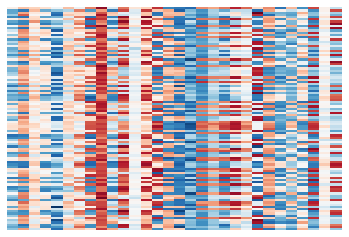

In [3]:
sns.heatmap(X, xticklabels=False, yticklabels=False, linewidths=0,cbar=False)

Computing the pairwise distances for visualization purposes


We can compute pairwise distances using the **sklearn.metrics** functions summarized here:
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [6]:
euclidean_dists = metrics.euclidean_distances(X)
euclidean_dists

array([[  0.        ,  47.73797008,  45.18787978, ...,  47.87535624,
         49.64694402,  45.58307694],
       [ 47.73797008,   0.        ,  43.66760596, ...,   7.3768511 ,
          7.36794305,  43.51069074],
       [ 45.18787978,  43.66760596,   0.        , ...,  42.55609472,
         43.80829605,   9.31642449],
       ..., 
       [ 47.87535624,   7.3768511 ,  42.55609472, ...,   0.        ,
          8.19377462,  41.81523421],
       [ 49.64694402,   7.36794305,  43.80829605, ...,   8.19377462,
          0.        ,  43.41205895],
       [ 45.58307694,  43.51069074,   9.31642449, ...,  41.81523421,
         43.41205895,   0.        ]])

Visualizing the data using the heatmap of pairwise distances

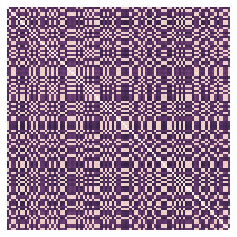

In [5]:

sns.heatmap(euclidean_dists, xticklabels=False, yticklabels=False, linewidths=0, square=True,cbar=False)

### Clustering data using  k-means clustering in sklearn.cluster  http://scikit-learn.org/stable/modules/clustering.html

In [7]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_

print "The total error of the clustering is: ", error
print '\nCluster labels'
print labels
print '\n Cluster Centroids'
print centroids


The total error of the clustering is:  2733.8430819

Cluster labels
[1 2 0 0 2 1 2 2 1 2 0 1 0 1 2 0 0 1 0 2 0 2 0 1 2 2 1 0 0 0 0 1 0 1 0 2 0
 2 0 2 2 2 1 0 1 0 1 2 1 0 0 1 1 1 1 0 1 2 2 0 1 0 2 1 1 2 0 1 1 2 2 2 1 1
 0 1 2 1 2 1 2 2 2 1 0 0 2 1 1 0 1 2 2 0 1 0 0 2 2 0]

 Cluster Centroids
[[-4.7833887   5.32946939 -0.87141823  1.38900567 -9.59956915  2.35207348
   2.22988468  2.03394692  8.9797878   3.67857655 -2.67618716 -1.17595897
   3.76433199 -8.46317271  3.28114395  3.73803392 -5.73436869 -7.0844462
  -3.75643598 -3.07904369  1.36974653 -0.95918462  9.91135428 -8.17722281
  -5.8656831  -6.76869078  3.12196673 -4.85745245 -0.70449349 -4.94582258]
 [ 0.88697885  4.29142902  1.93200132  1.10877989 -1.55994342  2.80616392
  -1.11495818  7.74595341  8.92512875 -2.29656298  6.09588722  0.47062896
   1.36408008  8.63168509 -8.54512921 -8.59161818 -9.64308952  6.92270491
   5.65321496  7.29061444  9.58822315  5.79602014 -0.84970449  5.46127493
  -7.77730238  2.75092191 -7.17026663  9.0

There are 3 functions in all the clustering classes, **fit()** **predict()** and **fit_predict()**. 

**fit()** is building the model from the training data (e.g. finding the
            centroids), 
            
**predict()** is assigning labels to test data after building
            the model, 
            
**fit_predict()** is doing both in the same data (e.g in
            kmeans, it finds the centroids and assigns the labels to the dataset)

### Visualizing the results of clustering

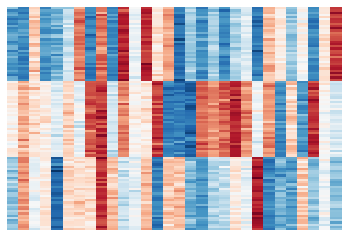

In [7]:
#print original and cluster data
idx = np.argsort(labels)
rX = X[idx,:]
sns.heatmap( rX,xticklabels=False, yticklabels=False, linewidths=0,cbar=False)

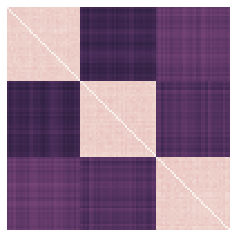

In [8]:
#Rearrange so that all same labels are consecutive

#print labels
#print labels[idx]
rearranged_dists = euclidean_dists[idx,:][:,idx]
sns.heatmap(rearranged_dists, xticklabels=False, yticklabels=False, linewidths=0, square=True,cbar=False)

## Deciding the number of clusters

### Using the error function

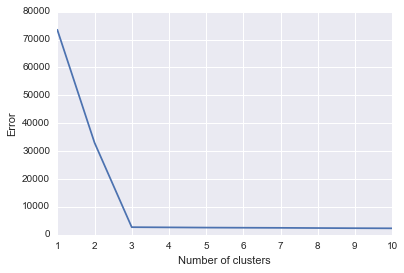

In [9]:
error = np.zeros(11)
error[0] = 0;
for k in range(1,11):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(X)
    error[k] = kmeans.inertia_

plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('Error')

Making this a function

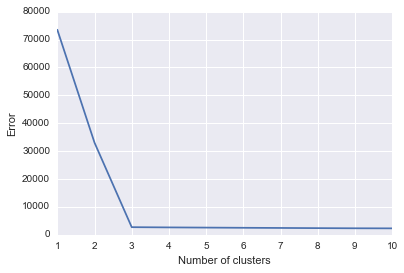

In [8]:
def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=100)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')

evaluate_clusters(X,10)

### Adjusted Rand Index

If $T$ is a ground truth label assignment and $C$ the clustering. Let $a$ be: the number of pairs of elements that have the same label in $T$ and the same label in $C$. Also let $b$ be: the number of pairs of elements that have different labels in $T$ and different labels in $C$. Then the Rand Index is: 
\begin{equation}
\text{RI}(T,C) = \frac{a+b}{n\choose 2}
\end{equation}



However the RI score does not guarantee that random label assignments will get a value close to zero (esp. if the number of clusters is in the same order of magnitude as the number of samples). To counter this effect we can discount the expected RI $E[\text{RI}]$ of random labelings by defining the adjusted Rand index as follows:

\begin{equation}
\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}
\end{equation}


Range?

In [ ]:
ri = metrics.adjusted_rand_score(labels,y)
print ri

In [ ]:
def ri_evaluate_clusters(X,max_clusters,ground_truth):
    ri = np.zeros(max_clusters+1)
    ri[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        ri[k] = metrics.adjusted_rand_score(kmeans.labels_,ground_truth)
    plt.plot(range(1,len(ri)),ri[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Adjusted Rand Index')
    
ri_evaluate_clusters(X,10,y)

Advantages/Disadvantages?

### Silhouette Coefficient

If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (**sklearn.metrics.silhouette_score**) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. Let $a$ be the mean distance between a sample and all other points in the same class and $b$ be the mean distance between a sample and all other points in the next nearest cluster. Then the 
**Silhouette Coefficient** for a clustering is:
$$s = \frac{b - a}{\max(a, b)}$$


Range?

In [ ]:
sc = metrics.silhouette_score(X, labels, metric='euclidean')
print sc

In [ ]:
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='cosine')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Adjusted Rand Index')
    
#sc_evaluate_clusters(X,10)

## Practicing with real data

### 20 Newsgroup data  http://scikit-learn.org/stable/datasets/twenty_newsgroups.html

In [ ]:
from sklearn.datasets import fetch_20newsgroups

"""
categories = [
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
    'rec.autos',
    'rec.sport.baseball'
]"""
categories = ['comp.os.ms-windows.misc', 'sci.space','rec.sport.baseball']
news_data = fetch_20newsgroups(subset='train', categories=categories)
print news_data.target, len(news_data.target)
print news_data.target_names

#### Data preprocessing

##### TF-IDF for text documents :  http://scikit-learn.org/stable/modules/feature_extraction.html

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)
data = vectorizer.fit_transform(news_data.data)

In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.

In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.

Tf means term-frequency while tf–idf means term-frequency times inverse document-frequency. This is a originally a term weighting scheme developed for information retrieval (as a ranking function for search engines results), that has also found good use in document classification and clustering.

$$\text{tf}(t,d) = \text{Number of times term }t \text{ occurs in document } d$$

If $N$ is the total number of documents in the corpus $D$ then

$$\text{idf}(t,D)=\frac{N}{|\{d\in D\mid t\in d \}}$$

$$\text{tf-idf}(t,d)=\text{tf}(t,d)\times \text{idf}(t,D)$$

#### Getting to know your data

In [ ]:
print type(data), data.shape

In [ ]:
fig, ax1 = plt.subplots(1,1,figsize=(15,10))
sns.heatmap(data[1:100,1:200].todense(), xticklabels=False, yticklabels=False, 
            linewidths=0, cbar=False, ax=ax1)

In [ ]:
print news_data.target
print news_data.target_names

#### Number of clusters

In [ ]:
evaluate_clusters(data, 10)

In [ ]:
ri_evaluate_clusters(data,10,news_data.target)

In [ ]:
sc_evaluate_clusters(data,10)

#### Looking into our clusters

In [ ]:
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans.fit_predict(data)

In [ ]:
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print "Cluster %d:" % i
    for ind in order_centroids[i, :10]:
        print ' %s' % terms[ind]
    print

In [ ]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()